# Facial Recognition with Siamese Neural Network For Biometric Authentication System

# **1. Setup**


## ***1.1 Install Dependencies***

In [1]:
# !pip install tensorflow==2.10.0 tensorflow-gpu==2.10.0 opencv-python matplotlib
!pip install tensorflow opencv-python matplotlib

## ***1.2 Import Dependencies***

In [2]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import tensorflow as tf

In [4]:
# Model(inputs=[inputimage, verificationimage] ,outputs= [1,0]) -> Examples

# ***Dense***
Give us a fully connected layer which is effectively what you typically see in most neural networks that sort of looks like this diagram below.


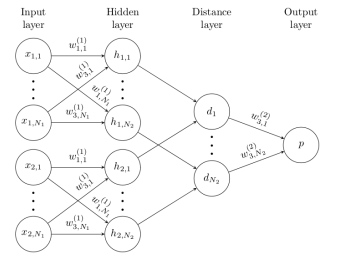

# ***Layer***
- One of the most inmportant layers that you're going to need, so when you're actually defining your model using the functional
- Give us our base class

# ***Class***
- Layer class is high level class, so this actually allows us to define a custom layer and when it actually

# ***Input***
- Allows us to define what we're passing through to our model and our layout effectively or our model actually allows us to compile it all together  

## ***1.3 Set GPU Growth***

### >> gpus = tf.config.experimental.list_physical_devices('GPU'):
Baris ini menggunakan TensorFlow untuk mendapatkan daftar perangkat GPU fisik yang tersedia pada sistem. list_physical_devices digunakan untuk mengidentifikasi perangkat keras GPU yang tersedia.

### >> for gpu in gpus:tf.config.experimental.set_memory_growth(gpu, True):

Dalam loop ini, kode mengiterasi melalui setiap perangkat GPU yang terdaftar dalam gpus. Untuk setiap GPU, tf.config.experimental.set_memory_growth(gpu, True) digunakan untuk mengatur pertumbuhan memori secara dinamis. Ini berarti alokasi memori pada GPU tidak akan dilakukan sekaligus, tetapi akan berkembang seiring waktu sesuai kebutuhan. Hal ini dapat membantu menghindari Out-Of-Memory (OOM) errors dengan memastikan bahwa GPU hanya menggunakan memori yang diperlukan, daripada mencoba mengalokasikan seluruh memori GPU sekaligus.

In [5]:
# avoid OOM (out of Memory) Errors by setting GPU Memory Consumption Growth
# Menghindari OOM errors dengan memastikan bahwa GPU hanya menggunakan memory yang diperlukan, daripada mencoba mengalokasikan sleuruh memori GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
# gpus
# len(gpus)

# Positive Image & Negative Image
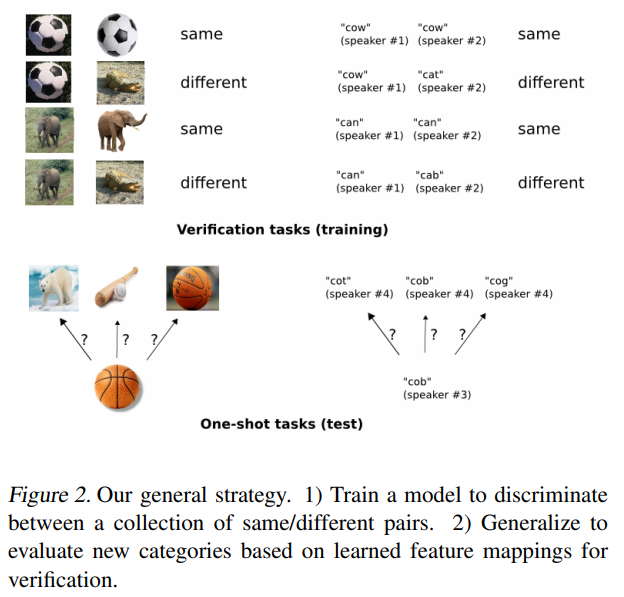

1. Positive Image : Disaat Input Image sama dengan Anchore Image

Misal:

"Cow"-------------------"Cow" (Same)

(Speaker #1) ------ (Speaker #2)

**Gambar**

Ball--------------------Ball (Same)


2. Negative Image : Disaat Input Image berbeda dengan Anchore Image

Misal:

"Cow"-------------------"Duck" (Different)

(Speaker #1) ------ (Speaker #2)

**Gambar**

Ball--------------------Balloon (Different)

## 1.4 Create Folder Structures

In [7]:
# Setup Paths
POS_PATH = os.path.join ('data', 'positive')
NEG_PATH = os.path.join ('data', 'negative')
ANC_PATH = os.path.join ('data', 'anchor')


'POS_PATH = os.path.join('data', 'positive'):

- Baris ini menggunakan modul os.path untuk menggabungkan dua komponen jalur menjadi satu.
- Dalam konteks ini, dua komponen yang digabungkan adalah string 'data' dan 'positive'. Hasilnya adalah variabel POS_PATH yang menyimpan jalur lengkap ke direktori yang berada di bawah folder 'data' dan bernama 'positive'.
- Misalnya, jika jalur sistem operasi adalah '/home/user/', maka POS_PATH akan menjadi '/home/user/data/positive'.

NEG_PATH = os.path.join('data', 'negative'):

- Serupa dengan baris sebelumnya, baris ini membuat jalur lengkap ke direktori 'negative' di bawah folder 'data'.
- Variabel NEG_PATH menyimpan jalur lengkap tersebut.

ANC_PATH = os.path.join('data', 'anchor'):

- Sama seperti sebelumnya, baris ini membuat jalur lengkap ke direktori 'anchor' di bawah folder 'data'. Variabel ANC_PATH menyimpan jalur lengkap tersebut.

In [8]:
# POS_PATH
# NEG_PATH
# ANC_PATH

In [9]:
# Make the directories
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

# **2. Collect Positives and Anchors**

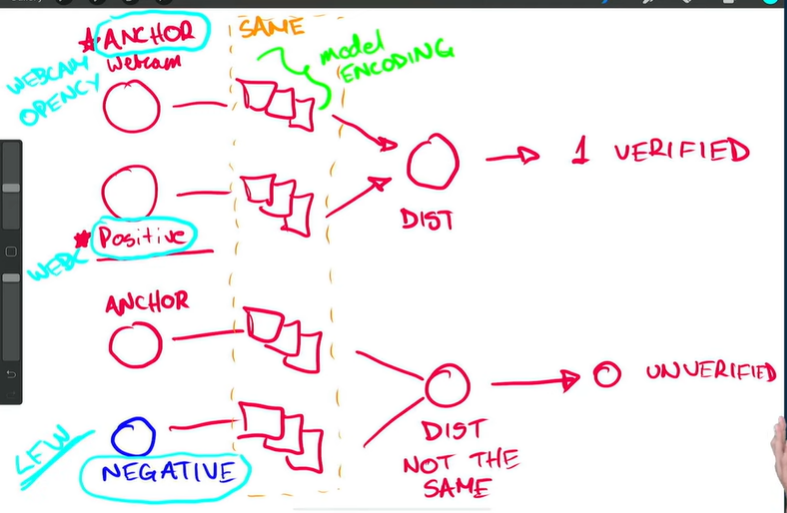

## 2.1 Untar Labelled Faces in the Wild Dataset

In [10]:
# https://vis-www.cs.umass.edu/lfw/

In [11]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

In [12]:
# Move LFW Images to the following repository data/negative
# for directory in os.listdir("lfw"):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
#         os.replace(EX_PATH, NEW_PATH)

- for directory in os.listdir('lfw'):

Ini adalah loop pertama yang akan mengiterasi melalui semua item (direktori atau file) di dalam direktori 'lfw'.


- for file in os.listdir('lfw', directory)

Ini adalah loop kedua yang akan mengiterasi melalui semua item (file) di dalam setiap direktori yang sedang diiterasi oleh loop pertama.

- EX_PATH = os.path.join('lfw', directory, file)

Membuat path lengkap untuk file yang sedang diiterasi saat ini dengan menggunakan os.path.join.

- NEW_PATH = os.path.join(NEG_PATH, file) 

Membuat path baru untuk file tersebut. Namun, ada kesalahan di sini karena variabel NEG_PATH tidak didefinisikan sebelumnya. Seharusnya mungkin NEW_PATH = os.path.join('new_directory', file).

- os.replace(EX_PATH, NEW_PATH) 

Mengganti (move/replace) file dari path lama (EX_PATH) ke path baru (NEW_PATH). Ini mengimplikasikan bahwa tujuan pindah file adalah direktori yang diidentifikasi oleh variabel NEW_PATH.

## 2.2 Collect Positive and Anchor Classes

In [13]:
# import uuid(universally unique identifiers) library to generate unique image names
import uuid

In [14]:
# uuid??
# uuid.uuid1()
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\efab0600-e2e0-11ee-82cc-401c839f1c89.jpg'

In [15]:
# Establish a Connection to the Webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): # looping
    ret, frame = cap.read()
    
    # Cut down frame to 250px x 250px
    frame = frame[120:120+250,250:200+250, :]
            
    # Collect Anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out Anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect Positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out POSITVE image
        cv2.imwrite(imgname, frame)
    
    # Show Image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking Gracefully -> if check is pass, it will make the looping run
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# Release the webcam
cap.release()

# Close the image show frame
cv2.destroyAllWindows()

In [16]:
# cv2.waitKey??

In [17]:
# plt.imshow(frame)
# frame

In [18]:
# frame.shape

In [19]:
# Cut the Frame
# frame[:250,:250,:].shape
# plt.imshow(frame[120:120+250,250:200+250, :])

- cap = cv2.VideoCapture(0): 

membuat objek VideoCapture bernama cap, yang dapat menangkap video dari kamera dengan indeks 0. Indeks kamera dapat berbeda-beda tergantung pada jumlah dan urutan kamera yang terhubung ke komputer.
while cap.isOpened(): membuat loop yang akan berjalan selama objek cap dapat menangkap video dari kamera.

- ret, frame = cap.read(): 

membaca frame gambar berikutnya dari video yang ditangkap oleh objek cap, dan menyimpannya dalam variabel frame. Variabel ret akan bernilai True jika pembacaan frame berhasil, dan False jika gagal atau video berakhir.

- cv2.imshow('Image Collection', frame): 

-- menampilkan frame gambar yang disimpan dalam variabel frame di sebuah jendela bernama Image Collection. 
-- Jendela ini akan terus diperbarui dengan frame gambar berikutnya selama loop berjalan.

- if cv2.waitKey(1) & 0XFF == ord('q'): 
-- membuat kondisi yang akan memeriksa apakah pengguna menekan tombol q pada keyboard. 
-- Fungsi cv2.waitKey(1) akan menunggu selama 1 milidetik untuk mendapatkan input dari keyboard, dan mengembalikan nilai ASCII dari tombol yang ditekan. 
-- Nilai ini kemudian dioperasikan dengan operator bitwise AND (&) dengan nilai heksadesimal 0XFF, yang akan menghasilkan nilai yang sama dengan nilai ASCII dari tombol yang ditekan. 
-- Fungsi ord(‘q’) akan mengembalikan nilai ASCII dari karakter q, yaitu 113. 
-- Jadi, kondisi ini akan bernilai True jika pengguna menekan tombol q, dan False jika tidak.

- break: 

menghentikan loop dan keluar dari program.

- cap.release(): 

melepaskan objek cap dan menutup kamera yang digunakan.

- cv2.destroyAllWindows(): 

menutup semua jendela yang dibuat oleh OpenCV.

# **3. LOAD and PREPROCESS IMAGES**

## Gameplan
1. Preprocess Images
2. Create positive and negative samples
3. Load data into TF Dataloader

   ## 3.1 Get Image Directories

In [20]:
# Creating a generator or using a generator to able to loop through and grab all of the files within that spesific directory
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

tf.data.dataset.list files method => to load up every single file inside of our anchor a positive and our negative directory 

In [21]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [22]:
dir_test = anchor.as_numpy_iterator()

In [23]:
print(dir_test.next())

b'data\\anchor\\75bbb454-c49f-11ee-ab71-401c839f1c89.jpg'


## 3.2 Preprocessing - Scale and Resize

In [24]:
def preprocess(file_path):
        
    
    # Read in image from file path 
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - Resizing the image to be 100x100x3
    img = tf.image.resize(img, (105,105))
    
    # scale image to be between 0 and 1
    img = img / 255.0
    
    # return image
    return img

Function above for able to load our image from that directory, resize it to be 105 pixels by 105 pixels and we also scaled it to be a value between 0 and 1, beacause that is going to help our gradient descent and effectively help us to optimize our Model

In [25]:
img = preprocess('data\\anchor\\74790a3e-c49f-11ee-84d2-401c839f1c89.jpg')

In [26]:
img.numpy().max()

0.9445378

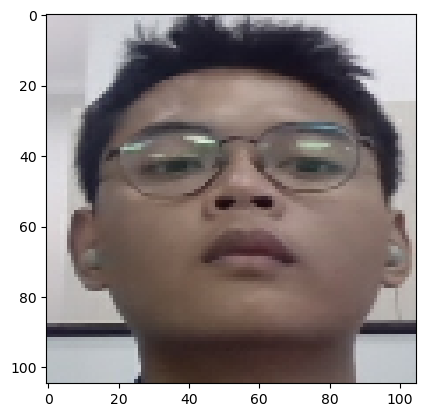

In [27]:
plt.imshow(img)

In [28]:
# dataset.map(preprocess)

## 3.3 Create Labelled Dataset

In [29]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0
# tf.ones_like([1,1,1,4.35235, 2352.5])

In [30]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [31]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [32]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

 - Concantinate yang berarti menggabungkan dua atau lebih string teks menjadi satu string. Misalnya, Anda dapat menggabungkan dua kata untuk membentuk kata baru, seperti “hujan” dan “pelangi” untuk membuat “hujanpelangi”. 
 
 - Anda juga dapat menggabungkan dua atau lebih string teks di Excel menggunakan fungsi CONCATENATE atau operator ampersand (&). Misalnya, Anda dapat menggabungkan teks “Halo” dan “Dunia” untuk mendapatkan “HaloDunia” atau “Halo Dunia” dengan spasi di antaranya12.

---

- created our labled data set so we're effectively Creating sets of twins not triplets so where you might have seen this done in siamese neural networks 
- before you typically create a triplet we're creating a twin or a tuple rather than a triplet because we're going to be passing through two values at the same time
- so we've created our positive samples and negative samples 
    - so really our positives are just going to be our anchor image plus our positive image and the label that we're going to get out of this is a one
    - then we created our negative samples and our negative sample is going to be our anchor image plus our negative image with a label of zero.
    
- then we concatenate them so we can work on them 
---------------------------------------------------------
- positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))): 

    - Baris ini membuat dataset yang berisi pasangan gambar yang mirip (anchor dan positive) dan labelnya yang bernilai. 
    - Fungsi tf.data.Dataset.zip menggabungkan dua atau lebih dataset menjadi satu dataset dengan elemen yang berpasangan. 
    - Fungsi tf.data.Dataset.from_tensor_slices membuat dataset dari tensor yang diberikan. 
    - Fungsi tf.ones membuat tensor yang berisi angka 1 dengan ukuran yang ditentukan.

---------------------------------------------------------
- negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))))): 

    - Baris ini membuat dataset yang berisi pasangan gambar yang tidak mirip (anchor dan negative) dan labelnya yang bernilai 0. 
    - Fungsi-fungsi yang digunakan sama dengan baris sebelumnya, hanya saja fungsi tf.zeros membuat tensor yang berisi angka 0.
    
----------------------------------------------------
- data = positives.concatenate(negatives)a: 

    - Baris ini menggabungkan dataset positives dan negatives menjadi satu dataset yang berisi pasangan gambar yang mirip dan tidak mirip secara acak. 
    - Fungsi concatenate menambahkan elemen dari dataset lain ke akhir dataset yang dipanggil.

In [33]:
samples = data.as_numpy_iterator()

In [34]:
samples.next()

(b'data\\anchor\\c3ce621b-c49f-11ee-9dd3-401c839f1c89.jpg',
 b'data\\positive\\adf9a01b-c4a9-11ee-884f-401c839f1c89.jpg',
 1.0)

In [35]:
example = samples.next()

In [36]:
example

(b'data\\anchor\\bc484b46-c49f-11ee-8617-401c839f1c89.jpg',
 b'data\\positive\\991b48a4-c4a9-11ee-afe9-401c839f1c89.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [37]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [38]:
res = preprocess_twin(*example)

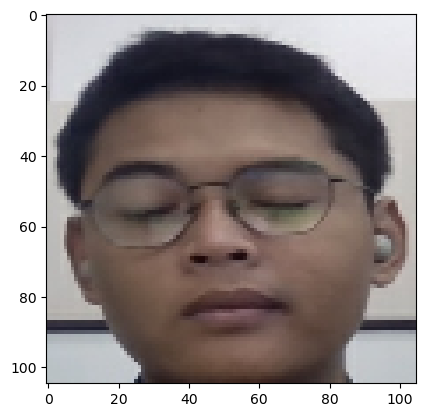

In [39]:
plt.imshow(res[1])

In [40]:
res[2]

1.0

In [41]:
# Build dataloader pipeline 
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [42]:
samples = data.as_numpy_iterator()

In [43]:
# samples.next()
samp = samples.next()

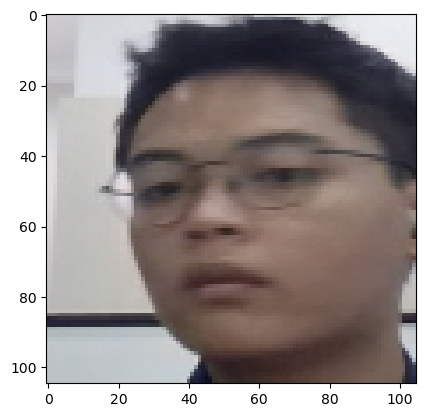

In [44]:
plt.imshow(samp[0])

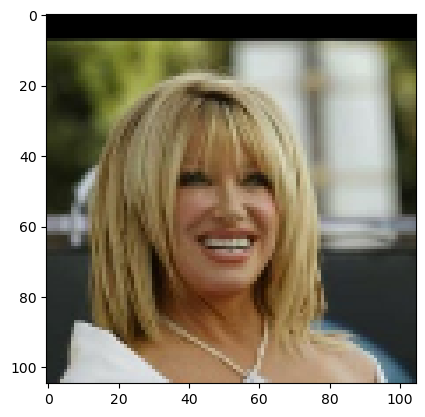

In [45]:
plt.imshow(samp[1])

In [46]:
# Indikator benar salahnya perbandingan gambar
samp[2]

0.0

In [47]:
len(samples.next())

3

In [48]:
round(len(data)*.7)

420

105, 105, None => Data Value 
Means 105px * 105px by the number of channels in our image or in our anchor 

In [49]:
# Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [50]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [51]:
train_samples = train_data.as_numpy_iterator()

In [52]:
train_sample = train_samples.next()

In [53]:
len(train_sample[0])

16

we have actually 16 got images inside of each sample that we actually have

# Model Engineering 
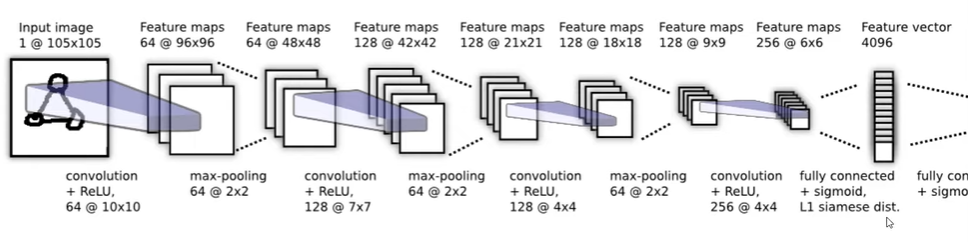
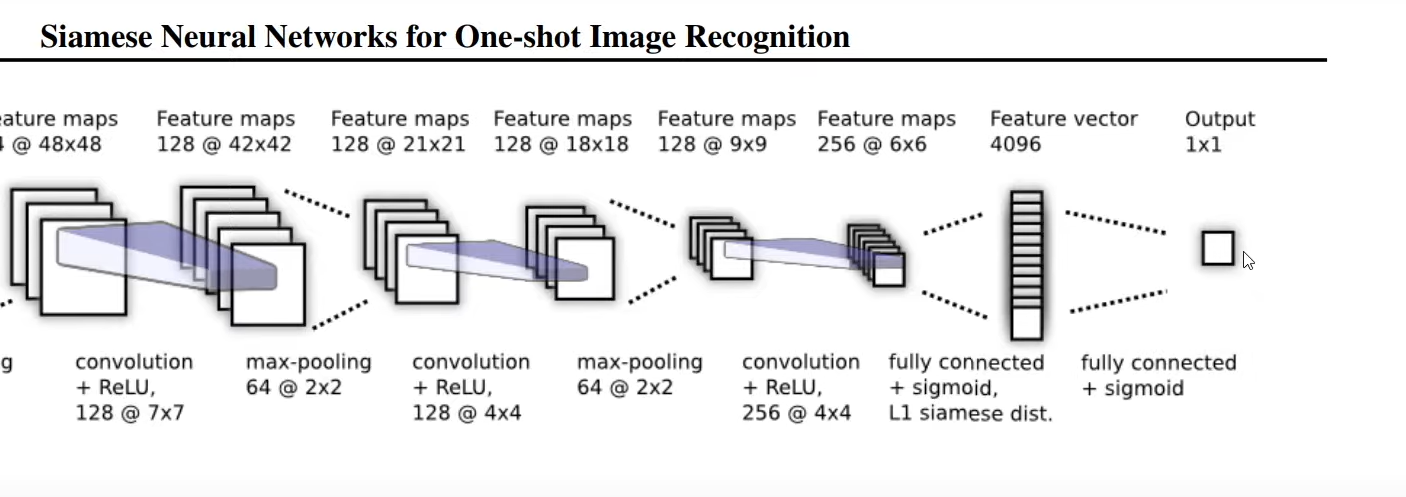
1. Build an Embedding Layer 
2. create an L1 Distance Layer 
    - WE going to be combining them downn over here where is says l1 siamese distance
    - So you're going to have two streams so an anchor and a positive or negative these are going to be passed through to our embedding layer and then they're effectively going to be compared once you get down to here so were going to compare them using our l1 siamese distance layer
3. Compile the siamese Network

## 4.1 Build Embedding Layer

Convolution + relu activation and in this case remember our convolution is composed of two key 
*actually 3 but he tell me that the other things for the last section
    1. our convolution takes the number of filters that we want to pass through so in this case, its going to be 64 filters and our filter shape is going to be 10 pixels by 10 pixels.
    2. 

In [54]:
inp = Input(shape=(105,105,3), name='input_image')

In [55]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [56]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [57]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [58]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)    
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [59]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)    
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [60]:
d1

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [61]:
def make_embedding():
    inp = Input(shape=(105,105,3), name='input_image')
    
    # First Block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    #Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third Block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)    
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)    
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [62]:
embedding = make_embedding()

In [63]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 21, 21, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 128)       26

## 4.2  Build Distance Layer

In [64]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
        
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [65]:
l1 = L1Dist()

In [66]:
# l1(anchor_embedding, validation_embedding)
l1

## 4.3 Make Siamese Model 

In [67]:
input_image = Input(name='input_img', shape=(105,105,3))
validation_image = Input(name='validation_img', shape=(105,105,3))

In [68]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [69]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [70]:
val_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [71]:
siamese_layer = L1Dist()

In [72]:
distances = siamese_layer(inp_embedding, val_embedding)

In [73]:
classifier = Dense(1, activation='sigmoid')(distances)

In [74]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [75]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name="SiameseNetwork")

In [76]:
siamese_network

In [77]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [78]:
def make_siamese_model():
    
    # Anchor image input in the network 
    input_image = Input(name='input_img', shape=(105,105,3))
    
    # validation image in the network
    validation_image = Input(name='validation_img', shape=(105,105,3))
    
    # combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # classification layer
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name="SiameseNetwork")

In [79]:
siamese_model = make_siamese_model()

In [80]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 5. Training

- Setup the loss Function & Optimiser
- Establish checkpointing
- Build a train step for batches
- Build a training loop
- Kickoff Training

## 5.1 Setup Loss and Optimiser

In [81]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [82]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [83]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

### The basic flow for training on one batch is as follows:
1. Make a prediction
2. Calculate loss
3. Derive gradients
4. Calculate new weights and apply

In [84]:
test_batch = train_data.as_numpy_iterator()

In [85]:
batch_1 = test_batch.next()

In [86]:
batch_1

(array([[[[0.78926235, 0.7853408 , 0.8088702 ],
          [0.8238095 , 0.81988794, 0.84341735],
          [0.83342665, 0.8373482 , 0.85695606],
          ...,
          [0.91675115, 0.9206727 , 0.936359  ],
          [0.9137255 , 0.91764706, 0.9372549 ],
          [0.9183117 , 0.9222333 , 0.9418412 ]],
 
         [[0.789109  , 0.7851874 , 0.80871683],
          [0.8238095 , 0.81988794, 0.84341735],
          [0.8336334 , 0.837555  , 0.85716283],
          ...,
          [0.91669333, 0.9206149 , 0.9363012 ],
          [0.91792715, 0.9218487 , 0.937535  ],
          [0.91413236, 0.9180539 , 0.9337402 ]],
 
         [[0.78614336, 0.7822218 , 0.8057512 ],
          [0.8238095 , 0.8234361 , 0.84519136],
          [0.8363212 , 0.84024274, 0.8598506 ],
          ...,
          [0.91531056, 0.91923213, 0.9349184 ],
          [0.91725355, 0.9211751 , 0.9368614 ],
          [0.91587305, 0.9197946 , 0.9354809 ]],
 
         ...,
 
         [[0.7480481 , 0.7754991 , 0.7990285 ],
          [0.75042

In [87]:
len(batch_1)

3

In [88]:
batch_1[0]

array([[[[0.78926235, 0.7853408 , 0.8088702 ],
         [0.8238095 , 0.81988794, 0.84341735],
         [0.83342665, 0.8373482 , 0.85695606],
         ...,
         [0.91675115, 0.9206727 , 0.936359  ],
         [0.9137255 , 0.91764706, 0.9372549 ],
         [0.9183117 , 0.9222333 , 0.9418412 ]],

        [[0.789109  , 0.7851874 , 0.80871683],
         [0.8238095 , 0.81988794, 0.84341735],
         [0.8336334 , 0.837555  , 0.85716283],
         ...,
         [0.91669333, 0.9206149 , 0.9363012 ],
         [0.91792715, 0.9218487 , 0.937535  ],
         [0.91413236, 0.9180539 , 0.9337402 ]],

        [[0.78614336, 0.7822218 , 0.8057512 ],
         [0.8238095 , 0.8234361 , 0.84519136],
         [0.8363212 , 0.84024274, 0.8598506 ],
         ...,
         [0.91531056, 0.91923213, 0.9349184 ],
         [0.91725355, 0.9211751 , 0.9368614 ],
         [0.91587305, 0.9197946 , 0.9354809 ]],

        ...,

        [[0.7480481 , 0.7754991 , 0.7990285 ],
         [0.7504202 , 0.7778712 , 0.8014006 ]

In [89]:
len(batch_1[0])

16

In [90]:
len(batch_1[1])


16

In [91]:
batch_1[1]

array([[[[8.03652525e-01, 7.95809388e-01, 8.15417230e-01],
         [8.09677184e-01, 8.01834047e-01, 8.21441889e-01],
         [8.18245113e-01, 8.06480348e-01, 8.33931386e-01],
         ...,
         [9.29729700e-01, 9.33651268e-01, 9.53259110e-01],
         [9.34113622e-01, 9.38035190e-01, 9.57643032e-01],
         [9.37919557e-01, 9.41841185e-01, 9.61449027e-01]],

        [[8.00000012e-01, 7.92156875e-01, 8.11764717e-01],
         [8.08783531e-01, 8.00940394e-01, 8.20548236e-01],
         [8.17947149e-01, 8.06182444e-01, 8.33633423e-01],
         ...,
         [9.29618478e-01, 9.33540046e-01, 9.53147948e-01],
         [9.33153272e-01, 9.37074840e-01, 9.56682682e-01],
         [9.31059062e-01, 9.34980631e-01, 9.54588473e-01]],

        [[8.02147567e-01, 7.94304430e-01, 8.13912272e-01],
         [8.02801073e-01, 7.94957936e-01, 8.14565778e-01],
         [8.19887936e-01, 8.08123231e-01, 8.35574210e-01],
         ...,
         [9.27637756e-01, 9.31559324e-01, 9.51167166e-01],
         [

In [92]:
len(batch_1[2])

16

In [93]:
batch_1[:2]

(array([[[[0.78926235, 0.7853408 , 0.8088702 ],
          [0.8238095 , 0.81988794, 0.84341735],
          [0.83342665, 0.8373482 , 0.85695606],
          ...,
          [0.91675115, 0.9206727 , 0.936359  ],
          [0.9137255 , 0.91764706, 0.9372549 ],
          [0.9183117 , 0.9222333 , 0.9418412 ]],
 
         [[0.789109  , 0.7851874 , 0.80871683],
          [0.8238095 , 0.81988794, 0.84341735],
          [0.8336334 , 0.837555  , 0.85716283],
          ...,
          [0.91669333, 0.9206149 , 0.9363012 ],
          [0.91792715, 0.9218487 , 0.937535  ],
          [0.91413236, 0.9180539 , 0.9337402 ]],
 
         [[0.78614336, 0.7822218 , 0.8057512 ],
          [0.8238095 , 0.8234361 , 0.84519136],
          [0.8363212 , 0.84024274, 0.8598506 ],
          ...,
          [0.91531056, 0.91923213, 0.9349184 ],
          [0.91725355, 0.9211751 , 0.9368614 ],
          [0.91587305, 0.9197946 , 0.9354809 ]],
 
         ...,
 
         [[0.7480481 , 0.7754991 , 0.7990285 ],
          [0.75042

In [94]:
# tf.losses.BinaryCrossentropy??

In [95]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:
        
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        #Forward Pass
        yhat = siamese_model(X, training=True)
        # Calculate Loss
        loss = binary_cross_loss(y, yhat)
    
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # return loss
    return loss


## 5.4 Build Training Loop

In [96]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(train_data))
        
        # loop through each batch 
        for idx, batch in enumerate(train_data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
            
        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the Model

In [97]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)

# 6. Evaluate Model
1. Test the model
2. Evaluate performance
3. Save the model for deployment

## 6.1 Import Metrics

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [ ]:
# Get a batch of test data 
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
test_var = test_data.as_numpy_iterator().next()

In [ ]:
y_true

In [ ]:
# np.array(test_var)

In [ ]:
# len(test_var)

In [ ]:
# test_var

In [ ]:
# test_var[0]

In [ ]:
# test_var[1]

In [ ]:
# test_var[2]

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

In [ ]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

## 6.3 Calculate Metrics

In [ ]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

## 6.4 Viz Results

In [ ]:
# Set plot size
plt.figure(figsize=(18,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set Second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders Cleanly
plt.show()

In [ ]:
# plt.subplot??

# 7. Save Model 

In [ ]:
# Save Weights
siamese_model.save('siamesemodel.h5')

In [ ]:
# Reload model
model = tf.keras.models.load_model('siamesemodel.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

In [ ]:
# view model summary
model.summary()

# 8. REAL TIME TEST
- Setup Verification Images
- Build Verify Function 
- Perform Recognition In Real Time 
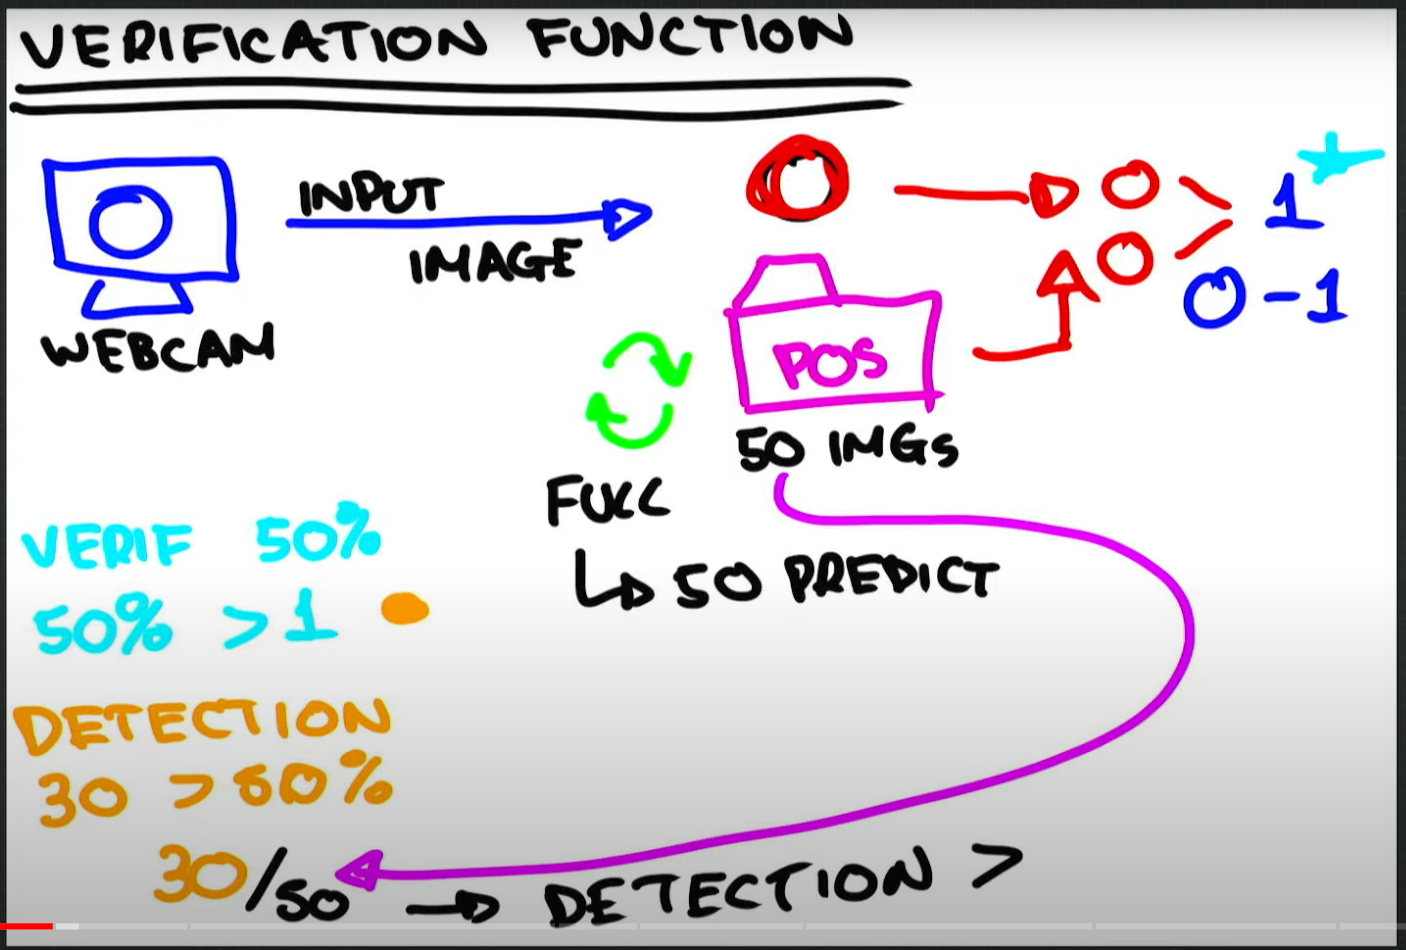

## 8.1 Verification Function

In [ ]:
# application_data\verification_images

In [ ]:
os.path.join('application_data', 'verification_images')

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

In [ ]:
# # Detection threshold: Metric above which a prediction is considered positive
# # Verification Threshold: Proportion of Positive predictions / total positive samples 

# # def verify(frame, model, detection_threshold, verification_threshold):
# def verify(model, detection_threshold, verification_threshold):
#     # Build results array
#     results = []
#     for image in os.listdir(os.path.join('application_data', 'verification_images')):
#         input_image = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
#         validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
#         # make predictions
#         result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
#         results.append(result)
        
#     # Detection Threshold: metric above which a prediction is considered positive
#     detection = np.sum(np.array(results) > detection_threshold)
    
#     # verification Threshold: Proportion of positive predictions / total positive samples
#     verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
#     verified = verification > verification_threshold
    
#     return results, verified
    

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [ ]:
30/50

## 8.2 OpenCV Real Time Verification

In [ ]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
#     frame = frame[120:120+250,200:200+250, :]
    
#     cv2.imshow('Verification', frame)
    
#     # Verification Triger
#     if cv2.waitKey(10) & 0xFF == ord('v'):
#         # save input image to application_data/input_image folder
#         cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
#         # run verification
# #         results, verified = verify(frame, model, 0.5, 0.5)
# #         results, verified = verify(model, 0.5, 0.5)
#         results, verified = verify(model, 0.9, 0.7)
#         print(verified)
        
        
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
        
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# model.summary()

In [ ]:
np.sum(np.squeeze(results) > 0.1)

In [ ]:
32/50

In [ ]:
results